# part A

### partA1_men_bachelor>50k_μ&*SD*

#### A1.1_men-usa

In [106]:
import pandas as pd

# load adult train
adult_train_path = 'adults.csv'
adult_train = pd.read_csv(adult_train_path)

# load adult test
adult_test_path = 'adults_test.csv'
adult_test = pd.read_csv(adult_test_path)

# filtering men-usa
men_usa = adult_train[(adult_train['Sex'] == 'Male') & (adult_train['Native Country'] == 'United-States')].shape[0]

print ("A1.1_men-usa")
print ("Amount of men from the USA:")
print (men_usa)

A1.1_men-usa
Amount of men from the USA:
19488


#### A1.2 bachelor salary>50

In [107]:
# all education levels
all_education_levels = adult_train['Education'].unique()
# print (all_education_levels) # select only four

# define bachelor and higher
higher_bachelor_levels = ['Bachelors', 'Masters', 'Doctorate', 'Prof-school']
bachelors_and_higher = adult_train[adult_train['Education'].isin(higher_bachelor_levels)]

# salary proportions
higher_education_salary_distribution = bachelors_and_higher['Salary'].value_counts(normalize=True)
# print (higher_education_salary_distribution) # prints salary proportions

# all bachelor > 50 ?
all_above_50K = (bachelors_and_higher['Salary'] == '>50K').all() # returns false

# salary percentages
percentage_above_50K = higher_education_salary_distribution['>50K'] * 100
percentage_below_or_equal_50K = higher_education_salary_distribution['<=50K'] * 100

# print results
if all_above_50K:
    result_sentence = "It is True that all adults with at least a Bachelor's degree earn more than 50K per year."
else:
    result_sentence = f"""It is False that all adults with at least a Bachelor's degree earn more than 50K per year.
    In fact, {percentage_above_50K:.2f}% earn more than 50K, while {percentage_below_or_equal_50K:.2f}% earn 50K or less."""

print (result_sentence)


It is False that all adults with at least a Bachelor's degree earn more than 50K per year.
    In fact, 48.46% earn more than 50K, while 51.54% earn 50K or less.


#### A1.3 hours by race and sex

In [108]:
# group by race and sex
grouped_data = adult_train.groupby(['Race', 'Sex']) # create groups for all combination

# extract only hours
hours_per_week = grouped_data['Hours Per Week']

# calculate stats with agg create dataframe with all aggregate functions
stats = hours_per_week.agg(
    min_hours='min',
    max_hours='max',
    avg_hours='mean',
    std_hours='std'
)

# convert race and sex from index (made by groupby) back into seperate columns for readable output
race_gender_stats = stats.reset_index()

print ("Hours per week by race and sex:")
print(race_gender_stats)


Hours per week by race and sex:
                 Race     Sex  min_hours  max_hours  avg_hours  std_hours
0  Amer-Indian-Eskimo  Female          4         84  36.579832  11.046509
1  Amer-Indian-Eskimo    Male          3         84  42.197917  11.596280
2  Asian-Pac-Islander  Female          1         99  37.439306  12.479459
3  Asian-Pac-Islander    Male          1         99  41.468975  12.387563
4               Black  Female          2         99  36.834084   9.419960
5               Black    Male          1         99  39.997451  10.909413
6               Other  Female          6         65  35.926606  10.300761
7               Other    Male          5         98  41.851852  11.084779
8               White  Female          1         99  36.296691  12.190951
9               White    Male          1         99  42.668822  12.194633


### partA2_preprosessing

#### A2.1_clean data

In [109]:
def clean_and_summarize(data, dataset_name="Dataset"):
    # Sum missing values and duplicates
    missing_values = data.isnull().sum()
    duplicates = data.duplicated().sum()

    # Size before cleaning
    size_before_cleaning = data.shape

    # Drop missing values and duplicates
    data_cleaned = data.dropna().drop_duplicates()

    # Size after cleaning
    size_after_cleaning = data_cleaned.shape

    # Calculate rows removed
    data_points_removed = size_before_cleaning[0] - size_after_cleaning[0]

    # Output summary
    print(f"{dataset_name} Summary:\n"
          f"Duplicates: {duplicates}\n"
          f"Missing values:\n{missing_values}\n\n"
          f"Size before cleaning: {size_before_cleaning}\n"
          f"Size after cleaning: {size_after_cleaning}\n"
          f"Data points removed: {data_points_removed}\n")

    return data_cleaned

# Example usage:
cleaned_train_data = clean_and_summarize(adult_train, "Train Data")
cleaned_test_data = clean_and_summarize(adult_test, "Test Data")


Train Data Summary:
Duplicates: 0
Missing values:
Unnamed: 0           0
Age                  0
Work Class        1836
Education            0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours Per Week       0
Native Country     583
Salary               0
dtype: int64

Size before cleaning: (32561, 12)
Size after cleaning: (30162, 12)
Data points removed: 2399

Test Data Summary:
Duplicates: 0
Missing values:
Unnamed: 0          0
Age                 0
Work Class        963
Education           0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours Per Week      0
Native Country    274
Salary              0
dtype: int64

Size before cleaning: (16281, 12)
Size after cleaning: (15060, 12)
Data points removed: 1221



#### A2.2_education ordinal encoding

In [110]:
# Import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

education_categories = [
    "Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th",
    "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors",
    "Masters", "Doctorate", "Prof-school"
]

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[education_categories])

# Apply OrdinalEncoder to cleaned_train_data
cleaned_train_data['education_ordinal'] = ordinal_encoder.fit_transform(
    cleaned_train_data[['Education']]
)

# Display transformed education ttraain data
education_ordinal = cleaned_train_data[["Education", "education_ordinal"]].head(20)
print("adult train educational ordinal encoding")
print(education_ordinal, "\n")

# Apply OrdinalEncoder to cleaned_test_data
cleaned_test_data['education_ordinal'] = ordinal_encoder.transform(
    cleaned_test_data[['Education']]
)


# Display transformed education test data
education_ordinal_test = cleaned_test_data[["Education", "education_ordinal"]].head(20)
print("adult test educational ordinal encoding")
print(education_ordinal_test)


adult train educational ordinal encoding
       Education  education_ordinal
0      Bachelors               12.0
1      Bachelors               12.0
2        HS-grad                8.0
3           11th                6.0
4      Bachelors               12.0
5        Masters               13.0
6            9th                4.0
7        HS-grad                8.0
8        Masters               13.0
9      Bachelors               12.0
10  Some-college                9.0
11     Bachelors               12.0
12     Bachelors               12.0
13    Assoc-acdm               11.0
15       7th-8th                3.0
16       HS-grad                8.0
17       HS-grad                8.0
18          11th                6.0
19       Masters               13.0
20     Doctorate               14.0 

adult test educational ordinal encoding
       Education  education_ordinal
0           11th                6.0
1        HS-grad                8.0
2     Assoc-acdm               11.0
3   Some-college 

#### A2.3_age scaled

In [111]:
from sklearn.preprocessing import StandardScaler

# fit the scaler on the training data
scaler = StandardScaler()
cleaned_train_data['age_scaled'] = scaler.fit_transform(cleaned_train_data[['Age']])

# tranform adult_test
cleaned_test_data['age_scaled'] = scaler.transform(cleaned_test_data[['Age']])

# select head
scaled_adult_train = cleaned_train_data[["Age", "age_scaled"]].head(20)
scaled_adult_test = cleaned_test_data[["Age", "age_scaled"]].head(20)

print("adult train age scaled")
print(scaled_adult_train)

print("adult test age scaled")
print(scaled_adult_test)


adult train age scaled
    Age  age_scaled
0    39    0.042796
1    50    0.880288
2    38   -0.033340
3    53    1.108695
4    28   -0.794697
5    37   -0.109476
6    49    0.804152
7    52    1.032559
8    31   -0.566290
9    42    0.271203
10   37   -0.109476
11   30   -0.642425
12   23   -1.175375
13   32   -0.490154
15   34   -0.337883
16   25   -1.023104
17   32   -0.490154
18   38   -0.033340
19   43    0.347338
20   40    0.118931
adult test age scaled
    Age  age_scaled
0    25   -1.023104
1    38   -0.033340
2    28   -0.794697
3    44    0.423474
5    34   -0.337883
7    63    1.870052
8    24   -1.099239
9    55    1.260967
10   65    2.022323
11   36   -0.185611
12   26   -0.946968
14   48    0.728017
15   43    0.347338
16   20   -1.403782
17   43    0.347338
18   37   -0.109476
20   34   -0.337883
21   34   -0.337883
23   25   -1.023104
24   25   -1.023104


#### A2.4.a_plotly pie countries

In [112]:
import plotly.express as px

def plot_native_country_distribution(df, column_name, title, threshold_other=0.4):

    # calculate the percentge of each country
    native_country_percentage = df[column_name].value_counts(normalize=True) * 100

    # identify countries below the thrushold
    other_countries = native_country_percentage[native_country_percentage < threshold_other]
    others_sum = other_countries.sum()

    # Keep countries above the threshold and sum up others
    native_country_mergedOther = native_country_percentage[native_country_percentage >= threshold_other]
    native_country_mergedOther['Others'] = others_sum

    # Plot
    fig = px.pie(values=native_country_mergedOther.values,
                 names=native_country_mergedOther.index,
                 title=title)
    fig.show()

plot_native_country_distribution(cleaned_train_data, 'Native Country', 'Distribution of train Adults by Native Country', threshold_other=0.4)
plot_native_country_distribution(cleaned_test_data, 'Native Country', 'Distribution of test Adults by Native Country', threshold_other=0.4)


#### A2.4.b_correlation

Normally correlation is only performed on train data, but the question requested test data too
Based on correlation alone, the feature most correlated with Salary in the Train Dataset is: 'education_ordinal' with a correlation of 0.34.


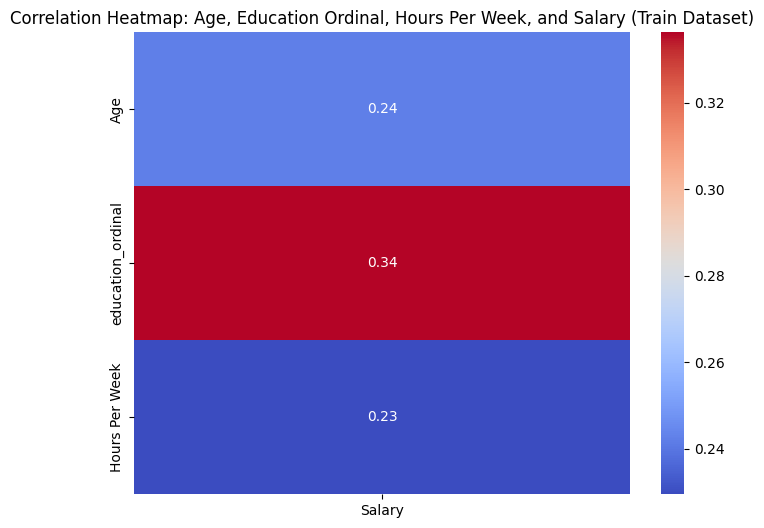

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(data, dataset_name):
    data_selected = data[['Age', 'education_ordinal', 'Hours Per Week', 'Salary']].copy()
    # Convert Salary to binary form for correlation
    data_selected['Salary'] = data_selected['Salary'].apply(lambda x: 0 if x == '<=50K' else 1)
    correlation_matrix = data_selected.corr()

    # most correlated to salary
    salary_correlations = correlation_matrix['Salary'].abs().drop('Salary')
    most_correlated_feature = salary_correlations.idxmax() # feature name
    highest_correlation_value = salary_correlations.max() # feature value
    print(f"Based on correlation alone, the feature most correlated with Salary in the {dataset_name} is: '{most_correlated_feature}' with a correlation of {highest_correlation_value:.2f}.")

    # correlation only with salary not between others
    correlation_matrix_with_salary = correlation_matrix[['Salary']].drop('Salary')

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix_with_salary, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap: Age, Education Ordinal, Hours Per Week, and Salary ({dataset_name})')
    plt.show()

print("Normally correlation is only performed on train data, but the question requested test data too")
plot_correlation_heatmap(cleaned_train_data, 'Train Dataset')



Based on correlation alone, the feature most correlated with Salary in the Test Dataset is: 'education_ordinal' with a correlation of 0.33.


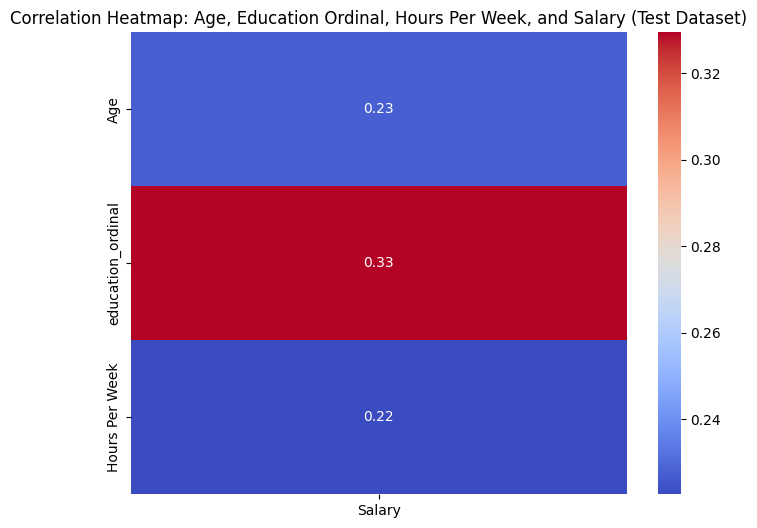

In [114]:
plot_correlation_heatmap(cleaned_test_data, 'Test Dataset')

### partA3_classification


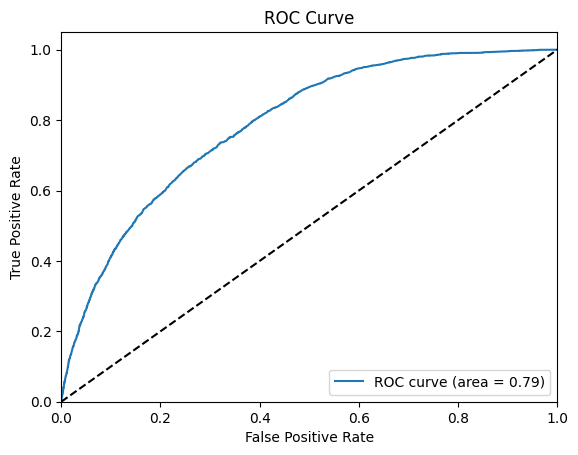

Q1 - Predicted Salary Classes (first 15 entries):
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
Q1 - Real Salary Classes (first 15 entries):
 [0 0 1 1 0 1 0 0 1 0 0 1 1 0 0]
Q2 - Confusion Matrix:
               Predicted <=50K  Predicted >50K
Actual <=50K            10562             798
Actual >50K              2459            1241
Q2 - True Positives (TP): 1241 - corresponds to the number of people that have a salary of >50K and were correctly classified as having a salary of >50K.
Q2 - True Negatives (TN): 10562 - corresponds to the number of people that have a salary of <=50K and were correctly classified as having a salary of <=50K.
Q2 - False Positives (FP): 798 - corresponds to the number of people that have a salary of <=50K but were incorrectly classified as having a salary of >50K.
Q2 - False Negatives (FN): 2459 - corresponds to the number of people that have a salary of >50K but were incorrectly classified as having a salary of <=50K.
Q3 - Accuracy: 0.7837
Q3 - Precision: 0.6086
Q3 - R

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# salary classes
salary_class = {'<=50K': 0, '>50K': 1}
cleaned_train_data['salary_class'] = cleaned_train_data['Salary'].map(salary_class)
cleaned_test_data['salary_class'] = cleaned_test_data['Salary'].map(salary_class)

# Use the following 3 features: Age, education_ordinal, Hours Per Week
X_train = cleaned_train_data[['age_scaled', 'education_ordinal', 'Hours Per Week']]
X_test = cleaned_test_data[['age_scaled', 'education_ordinal', 'Hours Per Week']]
y_train = cleaned_train_data['salary_class']
y_test = cleaned_test_data['salary_class']

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict salary classes on the test set
y_pred = logreg.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual <=50K', 'Actual >50K'],
                              columns=['Predicted <=50K', 'Predicted >50K'])
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy, precision, recall, f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC curve and AUC calculation
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print results
print("Q1 - Predicted Salary Classes (first 15 entries):\n", y_pred[:15])
print("Q1 - Real Salary Classes (first 15 entries):\n", y_test.head(15).values)
print("Q2 - Confusion Matrix:\n", conf_matrix_df)
print(f"Q2 - True Positives (TP): {TP} - corresponds to the number of people that have a salary of >50K and were correctly classified as having a salary of >50K.")
print(f"Q2 - True Negatives (TN): {TN} - corresponds to the number of people that have a salary of <=50K and were correctly classified as having a salary of <=50K.")
print(f"Q2 - False Positives (FP): {FP} - corresponds to the number of people that have a salary of <=50K but were incorrectly classified as having a salary of >50K.")
print(f"Q2 - False Negatives (FN): {FN} - corresponds to the number of people that have a salary of >50K but were incorrectly classified as having a salary of <=50K.")


print(f"Q3 - Accuracy: {accuracy:.4f}")
print(f"Q3 - Precision: {precision:.4f}")
print(f"Q3 - Recall: {recall:.4f}")
print(f"Q3 - F1 Score: {f1:.4f}")
print('''The model has good accuracy (78.37%), but low recall (33.54%, Recall = TP / (TP + FN)),
    and F1 score (43.25%, the balance between precision and recall) suggest it struggles to identify people earning >50K.
    This indicates an issue with class imbalance, leading to many false negatives. Consider handling class imbalance to improve performance.''')

print(f"Q4 - AUC: {roc_auc:.4f}")



# Part B

## 1 feature engineering

### 1_a_bivariate

In [116]:
import pandas as pd

# Load the data
file_path = 'boston.csv'
boston_df = pd.read_csv(file_path)


# Create bivariate LSTAT_PTRATIO chosen after experimenting to find a bivariate with increased correlation to target
boston_df['LSTAT_PTRATIO'] = boston_df['LSTAT'] * boston_df['PTRATIO']

#  correlation matrix
correlation_matrix = boston_df.corr()
correlation_with_medv = correlation_matrix['MEDV'].sort_values(ascending=False)

# Print correlations
print("Correlation with MEDV:")
print(f"LSTAT: {correlation_with_medv['LSTAT']:.4f}")
print(f"PTRATIO: {correlation_with_medv['PTRATIO']:.4f}")
print(f"LSTAT_PTRATIO: {correlation_with_medv['LSTAT_PTRATIO']:.4f}")

# Verify if LSTAT_PTRATIO correlation is higher than LSTAT and PTRATIO
if abs(correlation_with_medv['LSTAT_PTRATIO']) > max(abs(correlation_with_medv['LSTAT']), abs(correlation_with_medv['PTRATIO'])):
    print("The bivariate feature LSTAT_PTRATIO has a stronger correlation with MEDV than both LSTAT and PTRATIO individually.")
else:
    print("The bivariate feature LSTAT_PTRATIO does not have a stronger correlation with MEDV than both LSTAT and PTRATIO individually.")



Correlation with MEDV:
LSTAT: -0.7377
PTRATIO: -0.5078
LSTAT_PTRATIO: -0.7504
The bivariate feature LSTAT_PTRATIO has a stronger correlation with MEDV than both LSTAT and PTRATIO individually.


### 1_b_polynomial

In [117]:
# Create the RM^3 feature chosen after experimenting to find a polynomial feature with increased correlation to target
boston_df['RM^3'] = boston_df['RM'] ** 3

# Compute the correlation matrix for RM, RM^3, and MEDV
correlation_matrix_rm = boston_df[['RM', 'RM^3', 'MEDV']].corr()
correlation_with_medv_rm = correlation_matrix_rm['MEDV'].sort_values(ascending=False)

# Print correlations
print("Correlation with MEDV:")
print(f"RM: {correlation_with_medv_rm['RM']:.4f}")
print(f"RM^3: {correlation_with_medv_rm['RM^3']:.4f}")

# Verify if RM^3 correlation is higher than RM
if abs(correlation_with_medv_rm['RM^3']) > abs(correlation_with_medv_rm['RM']):
    print("The feature RM^3 has a stronger correlation with MEDV than RM.")
else:
    print("The feature RM^3 does not have a stronger correlation with MEDV than RM.")


Correlation with MEDV:
RM: 0.6954
RM^3: 0.7302
The feature RM^3 has a stronger correlation with MEDV than RM.


### 1_c_custom

In [118]:
# Create the custom feature 'RM_LSTAT_ratio' after experimenting to find a custom feature with increased correlation to target
boston_df['RM_LSTAT_ratio'] = boston_df['RM'] / boston_df['LSTAT']


correlation_matrix_rm_lstat = boston_df[['RM', 'LSTAT', 'RM_LSTAT_ratio', 'MEDV']].corr()
correlation_with_medv_rm_lstat = correlation_matrix_rm_lstat['MEDV'].sort_values(ascending=False)

# Print correlations
print("Correlation with MEDV:")
print(f"RM: {correlation_with_medv_rm_lstat['RM']:.4f}")
print(f"LSTAT: {correlation_with_medv_rm_lstat['LSTAT']:.4f}")
print(f"RM_LSTAT_ratio: {correlation_with_medv_rm_lstat['RM_LSTAT_ratio']:.4f}")

# Verify if RM_LSTAT_ratio correlation is higher than both RM and LSTAT
if abs(correlation_with_medv_rm_lstat['RM_LSTAT_ratio']) > abs(correlation_with_medv_rm_lstat['RM']) and abs(correlation_with_medv_rm_lstat['RM_LSTAT_ratio']) > abs(correlation_with_medv_rm_lstat['LSTAT']):
    print("The feature RM_LSTAT_ratio has a stronger correlation with MEDV than both RM and LSTAT.")
else:
    print("The feature RM_LSTAT_ratio does not have a stronger correlation with MEDV than both RM and LSTAT.")


Correlation with MEDV:
RM: 0.6954
LSTAT: -0.7377
RM_LSTAT_ratio: 0.8137
The feature RM_LSTAT_ratio has a stronger correlation with MEDV than both RM and LSTAT.


## 2 split data

In [119]:
from sklearn.model_selection import train_test_split


# select features and target
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

# Print dataset shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (455, 16)
y_train shape: (455,)
X_test shape: (51, 16)
y_test shape: (51,)


## 3_linear regression

In [120]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
print(predictions.head())


        y_pred  y_test
329  23.954466    22.6
371  22.105106    50.0
219  26.088656    23.0
403  13.264001     8.3
78   20.514739    21.2


## 4.mse

In [121]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 36.93


## 5.plot line chart

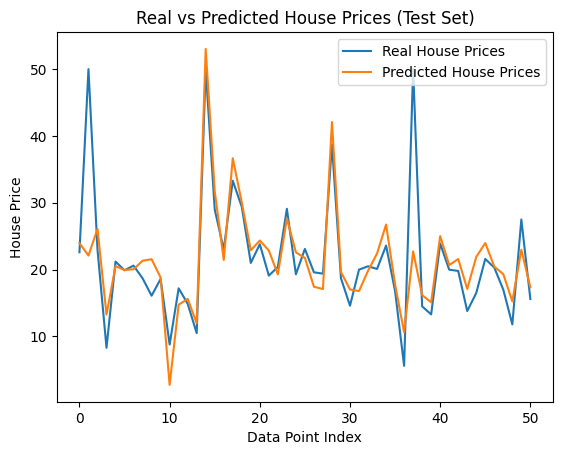

In [122]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Real House Prices')
plt.plot(y_pred, label='Predicted House Prices')
plt.xlabel('Data Point Index')
plt.ylabel('House Price')
plt.title('Real vs Predicted House Prices (Test Set)')
plt.legend()
plt.show()